In [2]:
import numpy as np
import math
from sklearn.cross_validation import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import accuracy_score, average_precision_score, precision_score,recall_score,roc_curve,precision_recall_curve, auc,f1_score, confusion_matrix
import operator
from random import uniform, randint
from cvxopt import solvers

ImportError: No module named base

In [63]:
def generate_data(samples, seperable):
    m=5;
    b=6;
    diff=1.0/samples
    x1=np.arange(0, 1, diff)
    x2=np.zeros(samples);
    y=np.zeros(samples);
    for i in range(samples):
        x2[i]=1.0*(m*x1[i])+b;
        if(x1[i]<uniform(0, 1)):
            x2[i]=x2[i]-uniform(5, 15)
        else:
            x2[i]=x2[i]+uniform(5, 15)
        if(x2[i]>((m*x1[i])+b)):
            y[i]=1;
        else:
            y[i]=-1;
    if(seperable==True):
        seperated=[randint(0,samples) for p in range(0,int(samples*0.05))]
        for i in seperated:
            y[i]=y[i]*-1;
    X=np.vstack([x1,x2])
    X=np.transpose(X)
    Y=np.array(y)
    return X, Y

In [69]:
X,Y=generate_data(200,False )

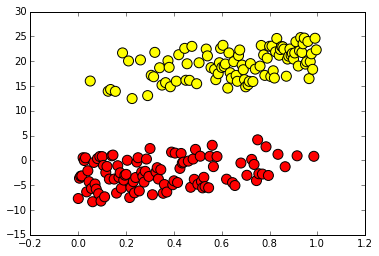

In [70]:
plt.scatter(X[:,0],X[:,1],c=Y, s=100,  cmap=plt.cm.autumn)
plt.show()

In [39]:
def kernel(matrix1, matrix2, kernel_type, degree, sigma):
    if(kernel_type=='linear'):
        result=np.dot(matrix1, matrix2);
    elif(kernel_type=='poly'):
        result=1+(np.dot(matrix1, matrix2))**degree;
    elif(kernel_type=='gaussian'):
        result=np.exp(-linalg.norm(matrix1-matrix2)**2/(2*(sigma**2)))
    return result;

In [73]:
def create_gram_matrix(x, kernel_type, degree, sigma ):
    gram=np.zeros((x.shape[0],x.shape[0]));
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            gram[i,j]=kernel(x[i],x[j], kernel_type, degree, sigma);
    return gram

In [13]:
def build_support_vectors(x,y, gram, margin):
    p=cvxopt.matrix(np.outer(y,y)*gram);
    q=cvxopt.matrix(np.ones(x.shape[0])*-1);
    a=cvxopt.matrix(y, (1,x.shape[0]));
    b=cvxopt.matrix(0.0);
    if(margin=='hard'):
        g=cvxopt.matrix(np.diag(np.ones(x.shape[0])*-1))
        h=cvxopt.matrix(np.zeros(x.shape[0]));
    elif(margin=='soft'):
        t1=np.diag(np.ones(x.shape[0])*-1)
        t2=np.identity(x.shape[0])
        g=cvxopt.matrix(n.vstack((t1,t2)))
        t1=np.zeros(x.shape[0])
        t2=np.ones(x.shape[0]*c);
        h=cvxopt.matrix(np.hstack((t1,t2)))
    result=cvxopt.solvers.qp(p,q,g,h,a,b)
    l_multipliers=np.ravel(result['x'])
    return l_multipliers;

In [14]:
def calc_b(support_vec, support_vec_y, multipliers, gram):
    b=0;
    for i in range(len(a)):
        b=b+support_vec_y[i];
        b=b-np.sum(multipliers*support_vec_y*gram[ind[i], support_vec])
    b=b/len(multipliers);

In [16]:
def calc_w(x, kernel_type, multipliers, support_vec, support_vec_y ):
    if(kernel_type=='linear'):
        w=np.zeros(x.shape[1]);
        for i in range(len(multipliers)):
            w=w+multipliers[i]*support_vec_y[i]*support_vec[i]
    else:
        w=None;
    return w;

In [18]:
def predict(x,multipliers, support_vec, support_vec_y, w, b, ):
    if(w is not None):
        y_predicted=np.dot(x, w)+b;
    else:
        y_predicted=np.zeros(x.shape[0]);
        for i in range(x.shape[0]):
            s=0;
            for a, support_vec_y, support_vec in zip(a, support_vec_y, support_vec):
                s=s+a*support_vec_y*kernel(x[i], support_vec, 'linear', 0, 0);
            y_predicted[i]=s;
        y_predicted=y_predicted+b;
    return(np.sign(y_predicted));
        

In [75]:
gram=create_gram_matrix(X, 'linear', 0, 0 )
multipliers=build_support_vectors(X,Y, gram, 'hard')

NameError: global name 'cvxopt' is not defined

In [43]:
def gen_lin_separable_data():
    # generate training data in the 2-d case
    mean1 = np.array([0, 2])
    mean2 = np.array([2, 0])
    cov = np.array([[0.8, 0.6], [0.6, 0.8]])
    X1 = np.random.multivariate_normal(mean1, cov, 100)
    y1 = np.ones(len(X1))
    X2 = np.random.multivariate_normal(mean2, cov, 100)
    y2 = np.ones(len(X2)) * -1
    return X1, y1, X2, y2

def split_train(X1, y1, X2, y2):
    X1_train = X1[:90]
    y1_train = y1[:90]
    X2_train = X2[:90]
    y2_train = y2[:90]
    X_train = np.vstack((X1_train, X2_train))
    y_train = np.hstack((y1_train, y2_train))
    return X_train, y_train

def split_test(X1, y1, X2, y2):
    X1_test = X1[90:]
    y1_test = y1[90:]
    X2_test = X2[90:]
    y2_test = y2[90:]
    X_test = np.vstack((X1_test, X2_test))
    y_test = np.hstack((y1_test, y2_test))
    return X_test, y_test

X1, y1, X2, y2 = gen_lin_separable_data()
X_train, y_train = split_train(X1, y1, X2, y2)
X_test, y_test = split_test(X1, y1, X2, y2)

"""def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])
        return K
        
clf = SVM()
clf.fit(X_train, y_train)"""

'def linear_kernel(x1, x2):\n    return np.dot(x1, x2)\n\ndef polynomial_kernel(x, y, p=3):\n    return (1 + np.dot(x, y)) ** p\n\ndef gaussian_kernel(x, y, sigma=5.0):\n    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))\n\nclass SVM(object):\n\n    def __init__(self, kernel=linear_kernel, C=None):\n        self.kernel = kernel\n        self.C = C\n        if self.C is not None: self.C = float(self.C)\n\n    def fit(self, X, y):\n        n_samples, n_features = X.shape\n\n        # Gram matrix\n        K = np.zeros((n_samples, n_samples))\n        for i in range(n_samples):\n            for j in range(n_samples):\n                K[i,j] = self.kernel(X[i], X[j])\n        return K\n        \nclf = SVM()\nclf.fit(X_train, y_train)'

In [68]:
print X_train[0].shape
print X[0]

(2L,)
[ 0.         -4.33478888]
